In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pydae.bmapu import bmapu_builder


In [2]:

P_bess = 10e6
E_bess = 20e6

data = {
"system":{"name":"smib","S_base":100e6, "K_p_agc":0.0,"K_i_agc":0.0,"K_xif":1e-6},       
"buses":[{"name":"1", "P_W":0.0,"Q_var":0.0,"U_kV":20.0}],
"vscs":[{"type":"bess_pq","bus":"1","E_kWh":E_bess/1e3,"S_n":P_bess,"K_delta":0.01}],
"sources":[{"type":"vsource","bus":"1"}]
}

grid = bmapu_builder.bmapu(data)
grid.checker()
grid.verbose = False 
grid.build('smib_bess_pq')

In [8]:
import smib_bess_pq

model = smib_bess_pq.model()
model.Dt = 1.0

model.ini({'A_loss_1':0.0,'R_bat_1':0.1},'xy_0.json')
model.run(0.5*3600,{'p_s_ref_1':1.0}) # half an hour discharging
model.run(1.0*3600,{'p_s_ref_1':-1.0}) # half an hour discharging
model.post()

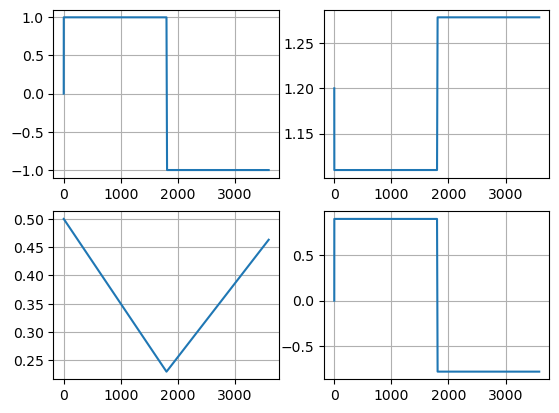

In [9]:
fig,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(model.Time, model.get_values('p_dc_1'))
axes[1,0].plot(model.Time, model.get_values('sigma_1'))
axes[0,1].plot(model.Time, model.get_values('v_dc_1'))
axes[1,1].plot(model.Time, model.get_values('i_dc_1'))

for ax in axes.flatten():
    ax.grid()

In [17]:
model = smib_bess_pq.model()
model.Dt = 1.0
model.decimation = 1

model.ini({'A_loss_1':0.0,'R_bat_1':0.1},'xy_0.json')
model.run(1.5*3600,{'p_s_ref_1':1.0}) # an hour discharging
model.post()

(-0.001, 0.001)

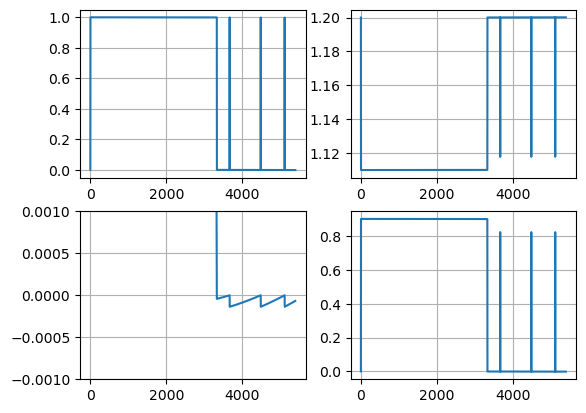

In [18]:
fig,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(model.Time, model.get_values('p_dc_1'))
axes[1,0].plot(model.Time, model.get_values('sigma_1'))
axes[0,1].plot(model.Time, model.get_values('v_dc_1'))
axes[1,1].plot(model.Time, model.get_values('i_dc_1'))

for ax in axes.flatten():
    ax.grid()

axes[1,0].set_ylim(-0.001,0.001)